# Computational Intelligence CI2024_lab2
> - Author: Daniel Bologna
> - ID: 310582

## The Traveling Salesman Problem
- [Travelling salesman problem - Wikipedia](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

### Import libraries

In [333]:
import logging
from itertools import combinations # Return r length subsequences of elements from the input iterable.
import pandas as pd
import numpy as np
from geopy.distance import geodesic ## compute distance between points
import networkx as nx
import matplotlib.pyplot as plt

from icecream import ic

logging.basicConfig(level=logging.DEBUG)

### Load Cities

In [334]:
def _load_cities(city_file_path : str) -> tuple[pd.DataFrame, np.ndarray]:
    """Loads TSP cities from CSV file.
    Args:
        city_file_path (str): The name of the city.
    Returns:
        tuple[pd.DataFrame, np.ndarray]
    """
    CITIES = pd.read_csv(f'{city_file_path}', header=None, names=['name', 'lat', 'lon'])
    DIST_MATRIX = np.zeros((len(CITIES), len(CITIES)))
    for c1, c2 in combinations(CITIES.itertuples(), 2):
        DIST_MATRIX[c1.Index, c2.Index] = DIST_MATRIX[c2.Index, c1.Index] = geodesic(
            (c1.lat, c1.lon), (c2.lat, c2.lon)
        ).km
    return CITIES, DIST_MATRIX

def _to_pandas_table(matrix, x_names, y_names):
    return pd.DataFrame(matrix, index=x_names, columns=y_names)

In [335]:
CITIES, DIST_MATRIX = _load_cities("cities/vanuatu.csv")
CITIES.head(10)

,name,lat,lon
0,Isangel,-19.53,169.28
1,Lakatoro,-16.09,167.40
2,Longana,-15.30,168.00
3,Luganville,-15.51,167.15
4,Norsup,-16.07,167.39
5,Port Olry,-15.05,167.05
6,Sola,-13.87,167.55
7,Vila,-17.74,168.31


In [336]:
_to_pandas_table(DIST_MATRIX, [str(_) for _ in CITIES['name']], [str(_) for _ in CITIES['name']])

,Isangel,Lakatoro,Longana,Luganville,Norsup,Port Olry,Sola,Vila
Isangel,0.000000,429.730587,487.494509,499.078125,432.187932,549.553211,652.957466,223.004751
Lakatoro,429.730587,0.000000,108.528818,69.545768,2.458238,121.048804,246.169150,206.739997
Longana,487.494509,108.528818,0.000000,94.155879,107.405375,105.770636,165.485112,272.040791
Luganville,499.078125,69.545768,94.155879,0.000000,67.091296,52.020596,186.502725,276.075871
Norsup,432.187932,2.458238,107.405375,67.091296,0.000000,118.613114,244.034302,209.196708
Port Olry,549.553211,121.048804,105.770636,52.020596,118.613114,0.000000,141.250458,326.691023
Sola,652.957466,246.169150,165.485112,186.502725,244.034302,141.250458,0.000000,435.911385
Vila,223.004751,206.739997,272.040791,276.075871,209.196708,326.691023,435.911385,0.000000


In [337]:
def tsp_cost(tsp):
    assert tsp[0] == tsp[-1]
    assert set(tsp) == set(range(len(CITIES)))

    tot_cost = 0
    for c1, c2 in zip(tsp, tsp[1:]):
        tot_cost += DIST_MATRIX[c1, c2]
    return tot_cost

# Visualization

Simple function that plot a graph

In [338]:
def _print_graph(solution, points=True, lines=True, p_color = "red", l_color = "red"):
    """Plot graph from coordinate matrix"""
    coord = [
        [CITIES.at[i, "lat"] for i in solution],
        [CITIES.at[i, "lon"] for i in solution]
    ]
    plt.axis("off")
    if points:
        plt.scatter(
            coord[0],
            coord[1],
            color=p_color
        )
    if lines:
        plt.plot(
            coord[0],
            coord[1],
            color=l_color
        )
    plt.show()

# Nearest Neighboor approach

> Start from a point, then choose the nearest point in the list of cities. Repeat until completion. 

ic| final_cost: '1475.5280911045313km'


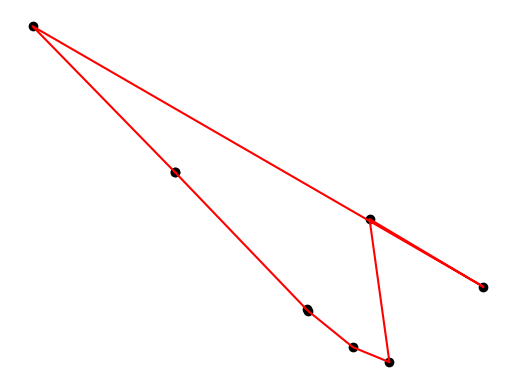

In [339]:
# Select a random point among the cities
visited = np.full(len(CITIES), False)
dist = DIST_MATRIX.copy()
city = np.random.randint(0, len(CITIES))

tsp_sol = list()
tsp_sol.append(int(city))
visited[city] = True

while not np.all(visited):
    # take the closest value to city
    dist[:, city] = np.inf
    closest = np.argmin(dist[city])
    visited[closest] = True
    city = closest
    tsp_sol.append(int(city))
tsp_sol.append(int(tsp_sol[0]))

final_cost = str(tsp_cost(tsp_sol)) + "km"
ic(final_cost)
_print_graph(tsp_sol, p_color="black")